# Taller 4: Estadísticas.


## Nombre: Brayan Andrés Ortiz González
## ID: 360727

### Descripción: La presente actividad consiste en realizar un análisis estadístico a un dataset utilizado en una actividad anterior, empleando las principales funciones y librerías de Python.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### 2) Información suministrada de la plataforma Kaggle sobre el DataSet seleccionado.

### COVID-19 Dataset:

#### Context:

* A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province.
* People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.
* The virus has shown evidence of human-to-human transmission.
* Transmission rate (rate of infection) appeared to escalate in mid-January 2020.
* As of 30 January 2020, approximately 8,243 cases have been confirmed.

#### Content:

* full_grouped.csv - Day to day country wise no. of cases (Has County/State/Province level data).
* covid19clean_complete.csv - Day to day country wise no. of cases (Doesn't have County/State/Province level data).
* countrywiselatest.csv - Latest country level no. of cases.
* day_wise.csv - Day wise no. of cases (Doesn't have country level data).
* usacountywise.csv - Day to day county level no. of cases.
* worldometer_data.csv - Latest data from https://www.worldometers.info/.

En mi caso, seleccioné el archivo "day_wise.csv" y "full_gruoped.csv".

### 3) Cargamos el archivo csv que contiene la información para poder manipular los datos.

In [11]:
World_Data = pd.read_csv('full_grouped.csv')
World_Data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


### 4) Renombrar
Aquí renombré las columnas para poder trabajar con ellas con mayor facilidad.

In [12]:
df2 = World_Data.rename(columns={'Date': 'fecha','Country/Region':'region','Confirmed':'c_conf','Deaths':'c_muertes','Recovered':'c_rec','Active':'c_activos','New cases':'n_casos','New deaths':'n_muertes','New recovered':'n_rec','WHO Region':'w_region'})
df2.head(1)

,fecha,region,c_conf,c_muertes,c_rec,c_activos,n_casos,n_muertes,n_rec,w_region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean


In [13]:
df4=df2.astype({'region':'string','fecha': 'datetime64[ns]','w_region':'string'})
df4

,fecha,region,c_conf,c_muertes,c_rec,c_activos,n_casos,n_muertes,n_rec,w_region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


Vamos a mostrar a continuación la media, varianza y desviación estándar de los valores de cada columna agrupando por países. 

### Promedios por países.

In [14]:
World_Data.groupby('Country/Region').mean()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Afghanistan,10299.946809,261.159574,4245.957447,5792.829787,192.888298,6.750000,134.031915
Albania,1046.287234,30.361702,632.324468,383.601064,25.957447,0.765957,14.601064
Algeria,6275.292553,414.744681,4020.728723,1839.819149,148.792553,6.186170,100.196809
Andorra,502.148936,28.845745,367.414894,105.888298,4.824468,0.276596,4.271277
Angola,120.542553,5.734043,34.962766,79.845745,5.053191,0.218085,1.287234
...,...,...,...,...,...,...,...
West Bank and Gaza,1241.813830,7.287234,325.127660,909.398936,56.494681,0.414894,19.957447
Western Sahara,4.792553,0.335106,3.446809,1.010638,0.053191,0.005319,0.042553
Yemen,357.340426,94.186170,126.484043,136.670213,8.994681,2.569149,4.430851


In [87]:
df4.groupby('fecha')

### Varianza por países.

In [15]:
World_Data.groupby('Country/Region').var()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Afghanistan,1.811391e+08,141689.878143,5.965929e+07,4.984244e+07,59445.479435,93.536096,97522.651382
Albania,1.598637e+06,1121.098418,5.368715e+05,2.632729e+05,1007.634543,1.677551,323.866737
Algeria,5.386574e+07,150094.394357,2.689544e+07,3.510789e+06,29700.496843,33.863551,18230.950364
Andorra,1.379831e+05,541.820998,1.223387e+05,2.433722e+04,119.942286,0.479235,83.257566
Angola,4.585971e+04,86.987712,3.549426e+03,2.144615e+04,119.826033,0.363949,37.200478
...,...,...,...,...,...,...,...
West Bank and Gaza,6.319992e+06,285.863579,3.768290e+05,3.828715e+06,13284.197833,1.356355,7779.292297
Western Sahara,1.740593e+01,0.224002,1.221641e+01,2.459779e+00,0.157583,0.005319,0.158607
Yemen,3.006915e+05,22854.120236,5.957592e+04,3.230302e+04,241.673768,37.562038,230.064712


### Desviación estándar por países.

In [16]:
World_Data.groupby('Country/Region').std()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Afghanistan,13458.792417,376.417160,7723.942474,7059.917579,243.814436,9.671406,312.286169
Albania,1264.372255,33.482808,732.715122,513.101303,31.743260,1.295203,17.996298
Algeria,7339.328093,387.420178,5186.080994,1873.709957,172.338321,5.819240,135.022037
Andorra,371.460824,23.277049,349.769547,156.003919,10.951817,0.692268,9.124558
Angola,214.148815,9.326720,59.577063,146.445050,10.946508,0.603282,6.099219
...,...,...,...,...,...,...,...
West Bank and Gaza,2513.959434,16.907501,613.864009,1956.710157,115.257094,1.164626,88.200296
Western Sahara,4.172042,0.473288,3.495198,1.568368,0.396968,0.072932,0.398255
Yemen,548.353443,151.175792,244.081789,179.730421,15.545860,6.128788,15.167884


### Paises con mayor número de casos confirmados de Covid 19.
Aquí se muestran los 5 valores más altos de casos confirmados de Covid 19 que se han registrado en el último mes. (En este caso corresponde a Julio del 2020)

In [17]:
df4.sort_values(by='c_conf',ascending=False)[['fecha','region','c_conf','w_region']].head(5)

,fecha,region,c_conf,w_region
35142,2020-07-27,US,4290259,Americas
34955,2020-07-26,US,4233923,Americas
34768,2020-07-25,US,4178970,Americas
34581,2020-07-24,US,4112531,Americas
34394,2020-07-23,US,4038816,Americas


### Paises con menor número de casos confirmados de Covid 19.
Aquí se muestran los 5 valores más bajos de casos confirmados de Covid 19 que se han registrado.

In [18]:
df4.sort_values(by='c_conf',ascending=True)[['fecha','region','c_conf','w_region']].head(5)

,fecha,region,c_conf,w_region
0,2020-01-22,Afghanistan,0,Eastern Mediterranean
5912,2020-02-22,Montenegro,0,Europe
5911,2020-02-22,Mongolia,0,Western Pacific
5910,2020-02-22,Monaco,0,Europe
5909,2020-02-22,Moldova,0,Europe


### Rango casos confirmados Covid 19.

In [19]:
Range1 = 4290259-0
print(Range1)

4290259


### Paises con mayor número de personas fallecidas por Covid 19.
Aquí se muestran los 5 valores más altos de personas fallecidas a causa del Covid 19.

In [20]:
df4.sort_values(by='c_muertes',ascending=False)[['fecha','region','c_muertes','w_region']].head(5)

,fecha,region,c_muertes,w_region
35142,2020-07-27,US,148011,Americas
34955,2020-07-26,US,146935,Americas
34768,2020-07-25,US,146465,Americas
34581,2020-07-24,US,145560,Americas
34394,2020-07-23,US,144430,Americas


### Paises con menor número de personas fallecidas por Covid 19.
Aquí se muestran los 5 valores más bajos de personas fallecidas a causa del Covid 19.

In [21]:
df4.sort_values(by='c_muertes',ascending=True)[['fecha','region','c_muertes','w_region']].head(5)

,fecha,region,c_muertes,w_region
0,2020-01-22,Afghanistan,0,Eastern Mediterranean
9736,2020-03-14,Bahrain,0,Eastern Mediterranean
9737,2020-03-14,Bangladesh,0,South-East Asia
9738,2020-03-14,Barbados,0,Americas
9739,2020-03-14,Belarus,0,Europe


### Rango casos "muertes" Covid 19.

In [22]:
Range2 = 148011-0
print(Range2)

148011


### Países con mayor número de personas recuperadas del Covid 19.

In [23]:
df4.sort_values(by='c_rec',ascending=False)[['fecha','region','c_rec','w_region']].head(5)

,fecha,region,c_rec,w_region
34992,2020-07-27,Brazil,1846641,Americas
34805,2020-07-26,Brazil,1812913,Americas
34618,2020-07-25,Brazil,1785359,Americas
34431,2020-07-24,Brazil,1693214,Americas
34244,2020-07-23,Brazil,1620313,Americas


### Países con menor número de personas recuperadas del Covid 19.

In [24]:
df4.sort_values(by='c_rec',ascending=True)[['fecha','region','c_rec','w_region']].head(5)

,fecha,region,c_rec,w_region
0,2020-01-22,Afghanistan,0,Eastern Mediterranean
7968,2020-03-04,Mongolia,0,Western Pacific
7969,2020-03-04,Montenegro,0,Europe
7970,2020-03-04,Morocco,0,Eastern Mediterranean
7971,2020-03-04,Mozambique,0,Africa


### Rango casos recuperados Covid 19.

In [25]:
Range3 = 1846641-0
print(Range3)

1846641


### Países con mayor número de casos activos Covid 19.

In [26]:
df4.sort_values(by='c_activos',ascending=False)[['fecha','region','c_activos','w_region']].head(5)

,fecha,region,c_activos,w_region
35142,2020-07-27,US,2816444,Americas
34955,2020-07-26,US,2789125,Americas
34768,2020-07-25,US,2753091,Americas
34581,2020-07-24,US,2705347,Americas
34394,2020-07-23,US,2661117,Americas


### Rango activos Covid 19.

In [27]:
Range4 = 2816444-0
print(Range4)

2816444


### Países con mayor promedio de casos confirmados.

In [117]:
df4.groupby('region').mean()[['c_conf']].sort_values(by='c_conf',ascending=False).head(5)

,c_conf
region,
US,1.193330e+06
Brazil,4.761966e+05
Russia,2.415341e+05
India,2.174652e+05
Spain,1.457662e+05


In [34]:
pie1 = df4.groupby('region').mean()[['c_conf']].sort_values(by='c_conf',ascending=False).head(5)

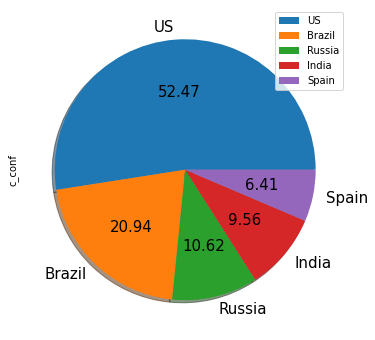

In [35]:
plot = pie1.plot.pie(y='c_conf', figsize=(6, 6), autopct='%.2f', shadow = True, textprops = {"fontsize":15})

### Países con mayor promedio de muertes. 

In [36]:
df4.groupby('region').mean()[['c_muertes']].sort_values(by='c_muertes',ascending=False).head(5)

,c_muertes
region,
US,58571.335106
United Kingdom,21264.760638
Brazil,20946.989362
Italy,19721.898936
France,16215.553191


In [37]:
pie2 = df4.groupby('region').mean()[['c_muertes']].sort_values(by='c_muertes',ascending=False).head(5)

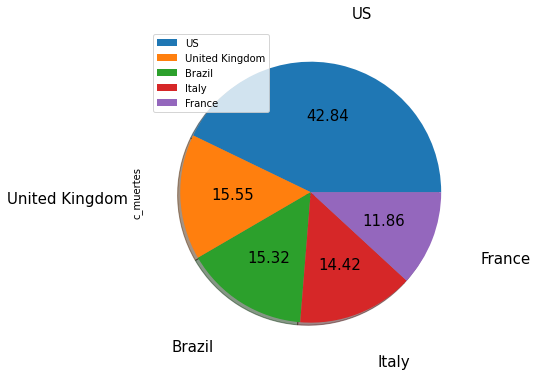

In [38]:
plot = pie2.plot.pie(y='c_muertes', figsize=(6, 6), autopct='%.2f', shadow = True, labeldistance=1.4, textprops = {"fontsize":15})
plt.legend(loc=2)

### Países con mayor promedio de recuperados.

In [39]:
df4.groupby('region').mean()[['c_rec']].sort_values(by='c_rec',ascending=False).head(5)

,c_rec
region,
US,299752.212766
Brazil,289855.707447
Russia,133619.404255
India,126509.148936
Germany,90999.143617


In [40]:
pie3 = df4.groupby('region').mean()[['c_rec']].sort_values(by='c_rec',ascending=False).head(5)

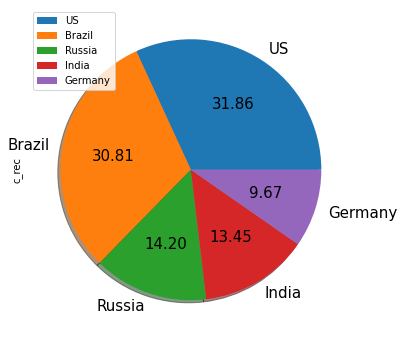

In [41]:
plot = pie3.plot.pie(y='c_rec', figsize=(6, 6), autopct='%.2f', shadow = True, labeldistance=1.1, textprops = {"fontsize":15})
plt.legend(loc=2)

### Países con mayor promedio de casos activos.

In [42]:
df4.groupby('region').mean()[['c_activos']].sort_values(by='c_activos',ascending=False).head(5)

,c_activos
region,
US,835005.962766
Brazil,165393.936170
United Kingdom,120343.590426
Russia,104620.095745
India,85042.090426


In [43]:
pie4 = df4.groupby('region').mean()[['c_activos']].sort_values(by='c_activos',ascending=False).head(5)

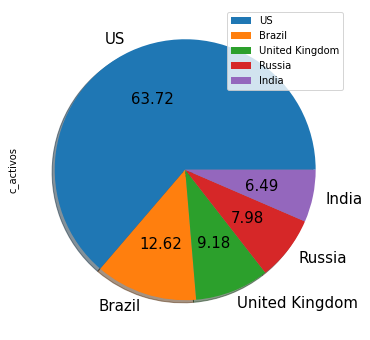

In [44]:
plot = pie4.plot.pie(y='c_activos', figsize=(6, 6), autopct='%.2f', shadow = True, labeldistance=1.1, textprops = {"fontsize":15})

### Promedios

In [45]:
# Casos Confirmados
mean1 = df4['c_conf'].mean()
mean2 = df4['c_muertes'].mean()
mean3 = df4['c_rec'].mean()
mean4 = df4['c_activos'].mean()

### Mediana

In [46]:
# Casos Confirmados
median1 = df4['c_conf'].median()
median2 = df4['c_muertes'].median()
median3 = df4['c_rec'].median()
median4 = df4['c_activos'].median()

### Moda

In [47]:
mode1 = df4['c_conf'].mode()
mode2 = df4['c_muertes'].mode()
mode3 = df4['c_rec'].mode()
mode4 = df4['c_activos'].mode()

In [48]:
print('La moda de casos "confirmados" de Covid 19 es: ' + str(mode1))
print('La moda de casos "muertes" de Covid 19 es: ' + str(mode2))
print('La moda de casos "recuperados" de Covid 19 es: ' + str(mode3))
print('La moda de casos "activos" de Covid 19 es: ' + str(mode4))

La moda de casos "confirmados" de Covid 19 es: 0    0
Name: c_conf, dtype: int64
La moda de casos "muertes" de Covid 19 es: 0    0
Name: c_muertes, dtype: int64
La moda de casos "recuperados" de Covid 19 es: 0    0
Name: c_rec, dtype: int64
La moda de casos "activos" de Covid 19 es: 0    0
Name: c_activos, dtype: int64


### Varianza

In [49]:
var1 = df4['c_conf'].var()
var2 = df4['c_muertes'].var()
var3 = df4['c_rec'].var()
var4 = df4['c_activos'].var()

In [50]:
print('La varianza de casos "confirmados" de Covid 19 es: ' + str(var1))
print('La varianza de casos "muertes" de Covid 19 es: ' + str(var2))
print('La varianza de casos "recuperados" de Covid 19 es: ' + str(var3))
print('La varianza de casos "activos" de Covid 19 es: ' + str(var4))

La varianza de casos "confirmados" de Covid 19 es: 22494550907.800827
La varianza de casos "muertes" de Covid 19 es: 55312514.33529362
La varianza de casos "recuperados" de Covid 19 es: 4166237854.559589
La varianza de casos "activos" de Covid 19 es: 8094869753.271661


### Desviación Estándar

In [51]:
std1 = df4['c_conf'].std()
std2 = df4['c_muertes'].std()
std3 = df4['c_rec'].std()
std4 = df4['c_activos'].std()

In [52]:
print('La desviación estándar de casos "confirmados" de Covid 19 es: ' + str(std1))
print('La desviación estándar de casos "muertes" de Covid 19 es: ' + str(std2))
print('La desviación estándar de casos "recuperados" de Covid 19 es: ' + str(std3))
print('La desviación estándar de casos "activos" de Covid 19 es: ' + str(std4))

La desviación estándar de casos "confirmados" de Covid 19 es: 149981.83525947676
La desviación estándar de casos "muertes" de Covid 19 es: 7437.238354072943
La desviación estándar de casos "recuperados" de Covid 19 es: 64546.40078702754
La desviación estándar de casos "activos" de Covid 19 es: 89971.4941149232


### Gráficas

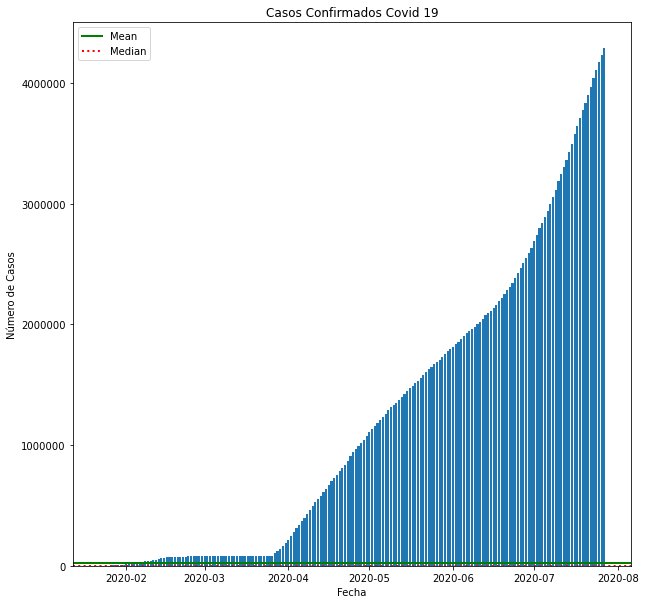

In [125]:
# Casos Confirmados
plt.figure(figsize=(10, 10))
plt.bar(df4['fecha'],df4['c_conf'])
plt.xlabel('Fecha')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean1, color='g', linestyle='solid', linewidth=2, label="Mean")
plt.axhline(median1, color='r', linestyle='dotted', linewidth=2, label="Median")
plt.ylabel("Número de Casos")
plt.title('Casos Confirmados Covid 19')
plt.legend()
plt.show()

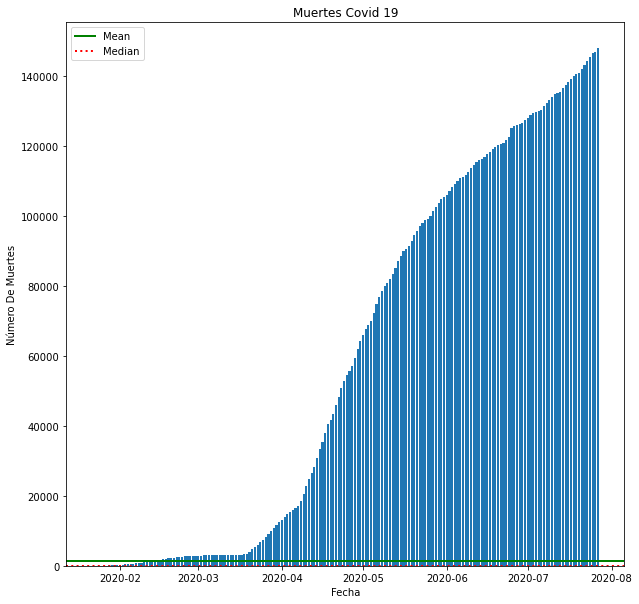

In [126]:
# Casos Muertes
plt.figure(figsize=(10, 10))
plt.bar(df4['fecha'],df4['c_muertes'])
plt.xlabel('Fecha')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean2, color='g', linestyle='solid', linewidth=2, label="Mean")
plt.axhline(median2, color='r', linestyle='dotted', linewidth=2, label="Median")
plt.ylabel("Número De Muertes")
plt.title('Muertes Covid 19')
plt.legend()
plt.show()

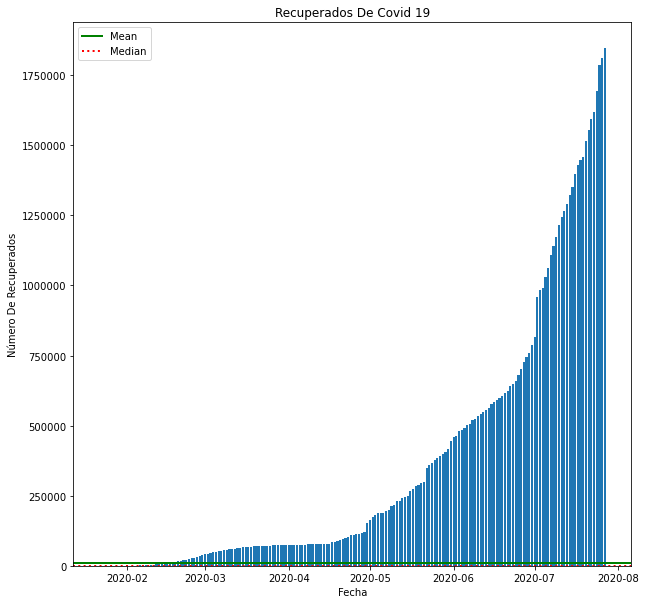

In [127]:
# Casos Recuperados
plt.figure(figsize=(10, 10))
plt.bar(df4['fecha'],df4['c_rec'])
plt.xlabel('Fecha')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean3, color='g', linestyle='solid', linewidth=2, label="Mean")
plt.axhline(median3, color='r', linestyle='dotted', linewidth=2, label="Median")
plt.ylabel("Número De Recuperados")
plt.title('Recuperados De Covid 19')
plt.legend()
plt.show()

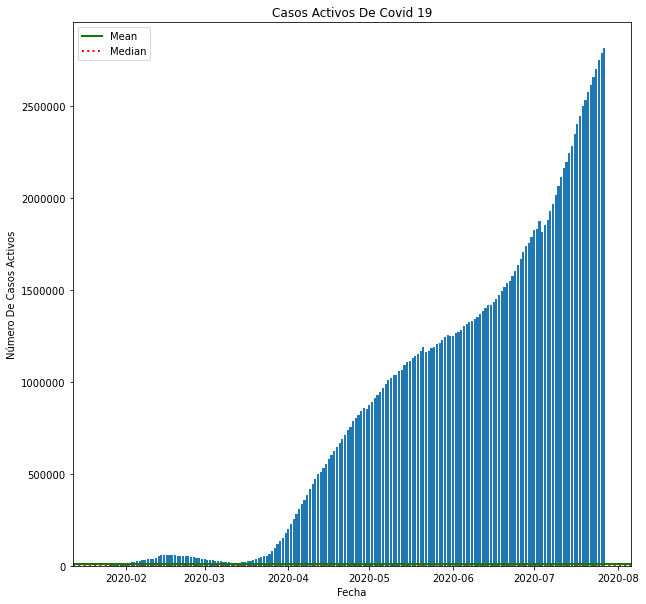

In [128]:
# Casos Activos
plt.figure(figsize=(10, 10))
plt.bar(df4['fecha'],df4['c_activos'])
plt.xlabel('Fecha')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean4, color='g', linestyle='solid', linewidth=2, label="Mean")
plt.axhline(median4, color='r', linestyle='dotted', linewidth=2, label="Median")
plt.ylabel("Número De Casos Activos")
plt.title('Casos Activos De Covid 19')
plt.legend()
plt.show()

### Cuartiles

In [125]:
df4.quantile([.25, .5, .75])

,c_conf,c_muertes,c_rec,c_activos,n_casos,n_muertes,n_rec
0.25,1.00,0.00,0.00,0.0,0.0,0.0,0.0
0.50,250.00,4.00,33.00,85.0,2.0,0.0,0.0
0.75,3640.25,78.25,1286.25,1454.0,75.0,1.0,20.0


In [126]:
df4.describe()

,c_conf,c_muertes,c_rec,c_activos,n_casos,n_muertes,n_rec
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


### Cuantiles

In [127]:
df4.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

,c_conf,c_muertes,c_rec,c_activos,n_casos,n_muertes,n_rec
0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.3,9.0,0.0,0.0,2.0,0.0,0.0,0.0
0.4,44.0,0.0,7.0,17.0,0.0,0.0,0.0
0.5,250.0,4.0,33.0,85.0,2.0,0.0,0.0
0.6,812.0,13.0,184.0,296.0,11.0,0.0,1.0
0.7,1989.0,45.0,749.0,846.0,40.0,1.0,9.0
0.8,7201.0,150.0,2219.0,2747.0,143.0,3.0,43.0
0.9,31410.0,900.0,13206.0,12773.0,557.0,14.0,254.0


In [2]:
Day_Wise = pd.read_csv('day_wise.csv')
Day_Wise

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [4]:
Date = Day_Wise['Date'].tolist()
Confirmed_Cases = Day_Wise['Confirmed'].tolist()
Deaths = Day_Wise['Deaths'].tolist()
Recovered = Day_Wise['Recovered'].tolist()
Active = Day_Wise['Active'].tolist()

In [5]:
Confirmed_Cases_Per_Month = []    # En estas listas vacías se almacenaran los datos correspondientes a cada mes.
Deaths_Per_Month = []
Recovered_Per_Month = []
Active_Per_Month = []

Last_Month = Date[0][5:7]                        

Sum_Confirmed_Cases = 0
Sum_Deaths = 0
Sum_Recovered_Cases = 0
Sum_Active_Cases = 0
Index = 0

while (Index < len(Date)):
    Current_Month = Date[Index][5:7]
    if(Last_Month == Current_Month):
        Sum_Confirmed_Cases += Confirmed_Cases[Index]
        Sum_Deaths += Deaths[Index]
        Sum_Recovered_Cases += Recovered[Index]
        Sum_Active_Cases += Active[Index]
    else:
        Confirmed_Cases_Per_Month.append([Last_Month, Sum_Confirmed_Cases])
        Deaths_Per_Month.append([Last_Month, Sum_Deaths])
        Recovered_Per_Month.append([Last_Month, Sum_Recovered_Cases])
        Active_Per_Month.append([Last_Month, Sum_Active_Cases])
        Sum_Confirmed_Cases = 0
        Sum_Deaths = 0
        Sum_Recovered_Cases = 0
        Sum_Active_Cases = 0
        Index -= 1

    # El if y el +1 se encargan de revisar si estamos en el último elemento para guardar la última suma.   
    if(Index + 1 >= len(Date)):
        Confirmed_Cases_Per_Month.append([Last_Month, Sum_Confirmed_Cases])
        Deaths_Per_Month.append([Last_Month, Sum_Deaths])
        Recovered_Per_Month.append([Last_Month, Sum_Recovered_Cases]) 
        Active_Per_Month.append([Last_Month, Sum_Active_Cases])

    Index += 1
    Last_Month = Current_Month

In [6]:
Confirmed_Cases_Per_Month_df = pd.DataFrame(Confirmed_Cases_Per_Month, columns = ['Months', 'Number Of Confirmed Cases Per Month'])
Deaths_Per_Month_df = pd.DataFrame(Deaths_Per_Month, columns = ['Months', 'Number Of Deaths Per Month'])
Recovered_Per_Month_df = pd.DataFrame(Recovered_Per_Month, columns = ['Months', 'Number Of Recovered Per Month'])
Active_Per_Month_df = pd.DataFrame(Active_Per_Month, columns = ['Months', 'Number Of Active Cases Per Month'])

In [7]:
Covid_19_df = Confirmed_Cases_Per_Month_df.merge(Deaths_Per_Month_df, on="Months", how="left").\
merge(Recovered_Per_Month_df, on="Months", how="left").merge(Active_Per_Month_df, on='Months', how='left')
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']
Covid_19_df['Months']= Covid_19_df['Months'].replace(['01', '02', '03', '04', '05', '06', '07'], Months)
Covid_19_df

,Months,Number Of Confirmed Cases Per Month,Number Of Deaths Per Month,Number Of Recovered Per Month,Number Of Active Cases Per Month
0,Jan,38534,889,838,36807
1,Feb,1663437,46875,363669,1252893
2,Mar,9002815,397601,2644372,5960842
3,Apr,63391662,4311214,15944020,43136428
4,May,144990399,9609604,52876838,82503957
5,June,246525787,13309053,116984268,116232466
6,July,362895848,15709667,199594224,147591957


### Promedios.

In [63]:
mean_c = Covid_19_df['Number Of Confirmed Cases Per Month'].mean()
mean_d = Covid_19_df['Number Of Deaths Per Month'].mean()
mean_r = Covid_19_df['Number Of Recovered Per Month'].mean()
mean_a = Covid_19_df['Number Of Active Cases Per Month'].mean()

In [100]:
print('La media de casos "confirmados" de Covid 19 es: ' + str(mean_c))
print('La media de casos "muertes" de Covid 19 es: ' + str(mean_d))
print('La media de casos "recuperados" de Covid 19 es: ' + str(mean_r))
print('La media de casos "activos" de Covid 19 es: ' + str(mean_a))

La media de casos "confirmados" de Covid 19 es: 118358354.57142857
La media de casos "muertes" de Covid 19 es: 6197843.285714285
La media de casos "recuperados" de Covid 19 es: 55486889.85714286
La media de casos "activos" de Covid 19 es: 56673621.428571425


### Mediana

In [64]:
median_c = Covid_19_df['Number Of Confirmed Cases Per Month'].median()
median_d = Covid_19_df['Number Of Deaths Per Month'].median()
median_r = Covid_19_df['Number Of Recovered Per Month'].median()
median_a = Covid_19_df['Number Of Active Cases Per Month'].median()

In [99]:
print('La mediana de casos "confirmados" de Covid 19 es: ' + str(median_c))
print('La mediana de casos "muertes" de Covid 19 es: ' + str(median_d))
print('La mediana de casos "recuperados" de Covid 19 es: ' + str(median_r))
print('La mediana de casos "activos" de Covid 19 es: ' + str(median_a))

La mediana de casos "confirmados" de Covid 19 es: 63391662.0
La mediana de casos "muertes" de Covid 19 es: 4311214.0
La mediana de casos "recuperados" de Covid 19 es: 15944020.0
La mediana de casos "activos" de Covid 19 es: 43136428.0


### Moda

In [65]:
mode_c = Covid_19_df['Number Of Confirmed Cases Per Month'].mode()
mode_d = Covid_19_df['Number Of Deaths Per Month'].mode()
mode_r = Covid_19_df['Number Of Recovered Per Month'].mode()
mode_a = Covid_19_df['Number Of Active Cases Per Month'].mode()

In [68]:
stats.mode(Covid_19_df['Number Of Confirmed Cases Per Month'])

ModeResult(mode=array([38534], dtype=int64), count=array([1]))

### Varianza

In [72]:
var_c = Covid_19_df['Number Of Confirmed Cases Per Month'].var()
var_d = Covid_19_df['Number Of Deaths Per Month'].var()
var_r = Covid_19_df['Number Of Recovered Per Month'].var()
var_a = Covid_19_df['Number Of Active Cases Per Month'].var()

In [73]:
print('La varianza de casos "confirmados" de Covid 19 es: ' + str(var_c))
print('La varianza de casos "muertes" de Covid 19 es: ' + str(var_d))
print('La varianza de casos "recuperados" de Covid 19 es: ' + str(var_r))
print('La varianza de casos "activos" de Covid 19 es: ' + str(var_a))

La varianza de casos "confirmados" de Covid 19 es: 1.9921999545394036e+16
La varianza de casos "muertes" de Covid 19 es: 44353839841590.24
La varianza de casos "recuperados" de Covid 19 es: 5838150886880652.0
La varianza de casos "activos" de Covid 19 es: 3585805572826414.0


### Desviación Estándar

In [74]:
std_c = Covid_19_df['Number Of Confirmed Cases Per Month'].std()
std_d = Covid_19_df['Number Of Deaths Per Month'].std()
std_r = Covid_19_df['Number Of Recovered Per Month'].std()
std_a = Covid_19_df['Number Of Active Cases Per Month'].std()

In [75]:
print('La desviación estándar de casos "confirmados" de Covid 19 es: ' + str(std_c))
print('La desviación estándar de casos "muertes" de Covid 19 es: ' + str(std_d))
print('La desviación estándar de casos "recuperados" de Covid 19 es: ' + str(std_r))
print('La desviación estándar de casos "activos" de Covid 19 es: ' + str(std_a))

La desviación estándar de casos "confirmados" de Covid 19 es: 141145313.57928267
La desviación estándar de casos "muertes" de Covid 19 es: 6659867.854664253
La desviación estándar de casos "recuperados" de Covid 19 es: 76407793.36481752
La desviación estándar de casos "activos" de Covid 19 es: 59881596.278209


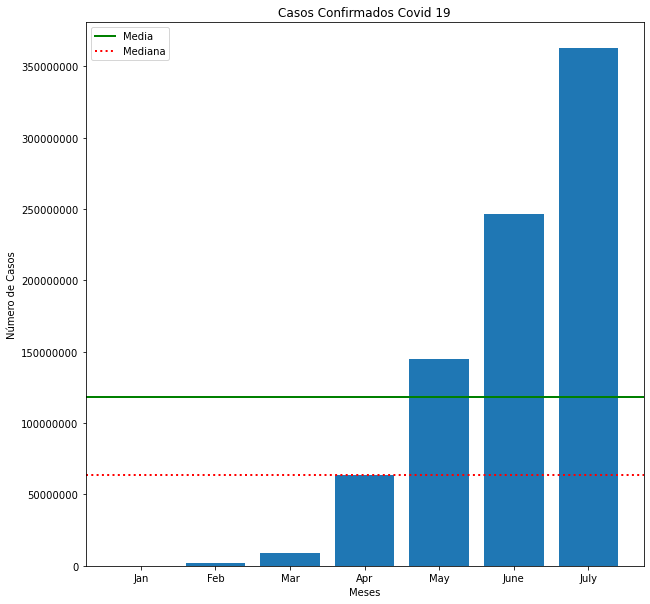

In [78]:
# Casos Confirmados
plt.figure(figsize=(10, 10))
plt.bar(Covid_19_df['Months'], Covid_19_df['Number Of Confirmed Cases Per Month'])
plt.xlabel('Meses')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean_c, color='g', linestyle='solid', linewidth=2, label="Media")
plt.axhline(median_c, color='r', linestyle='dotted', linewidth=2, label="Mediana")
plt.ylabel("Número de Casos")
plt.title('Casos Confirmados Covid 19')
plt.legend()
plt.show()

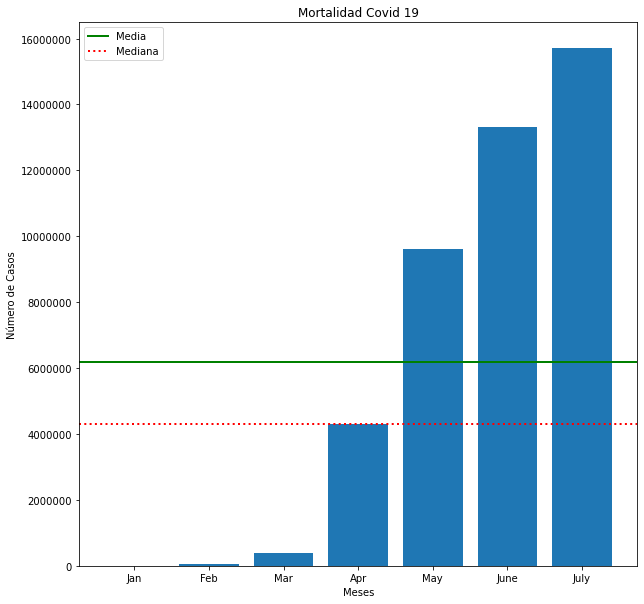

In [80]:
# Casos Muertes
plt.figure(figsize=(10, 10))
plt.bar(Covid_19_df['Months'], Covid_19_df['Number Of Deaths Per Month'])
plt.xlabel('Meses')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean_d, color='g', linestyle='solid', linewidth=2, label="Media")
plt.axhline(median_d, color='r', linestyle='dotted', linewidth=2, label="Mediana")
plt.ylabel("Número de Casos")
plt.title('Mortalidad Covid 19')
plt.legend()
plt.show()

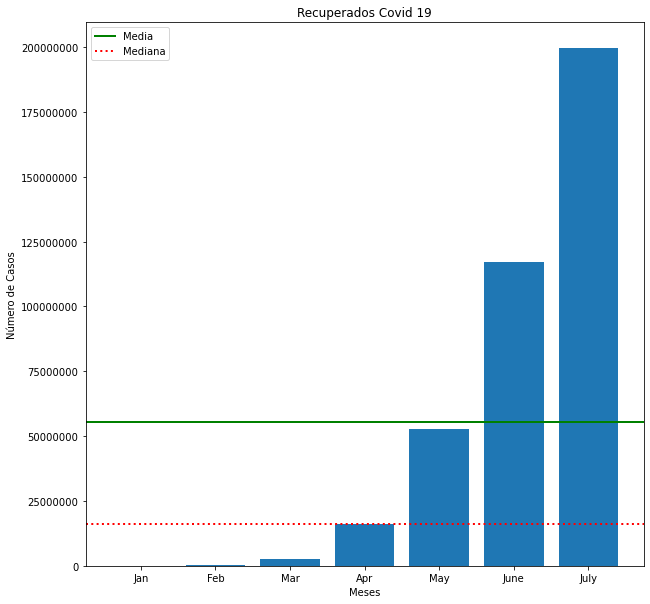

In [84]:
# Casos Recuperados
plt.figure(figsize=(10, 10))
plt.bar(Covid_19_df['Months'], Covid_19_df['Number Of Recovered Per Month'])
plt.xlabel('Meses')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean_r, color='g', linestyle='solid', linewidth=2, label="Media")
plt.axhline(median_r, color='r', linestyle='dotted', linewidth=2, label="Mediana")
plt.ylabel("Número de Casos")
plt.title('Recuperados Covid 19')
plt.legend()
plt.show()

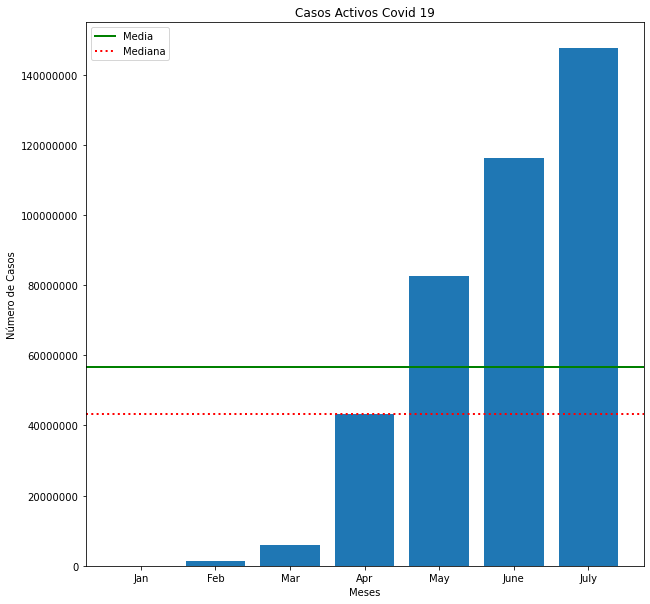

In [85]:
# Casos Activos
plt.figure(figsize=(10, 10))
plt.bar(Covid_19_df['Months'], Covid_19_df['Number Of Active Cases Per Month'])
plt.xlabel('Meses')
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.axhline(mean_a, color='g', linestyle='solid', linewidth=2, label="Media")
plt.axhline(median_a, color='r', linestyle='dotted', linewidth=2, label="Mediana")
plt.ylabel("Número de Casos")
plt.title('Casos Activos Covid 19')
plt.legend()
plt.show()

### Cuartiles

In [107]:
Covid_19_df.quantile([.25, .5, .75])

,Number Of Confirmed Cases Per Month,Number Of Deaths Per Month,Number Of Recovered Per Month,Number Of Active Cases Per Month
0.25,5333126.0,222238.0,1504020.5,3606867.5
0.50,63391662.0,4311214.0,15944020.0,43136428.0
0.75,195758093.0,11459328.5,84930553.0,99368211.5


In [106]:
Covid_19_df.describe()

,Number Of Confirmed Cases Per Month,Number Of Deaths Per Month,Number Of Recovered Per Month,Number Of Active Cases Per Month
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1.183584e+08,6.197843e+06,5.548689e+07,5.667362e+07
std,1.411453e+08,6.659868e+06,7.640779e+07,5.988160e+07
min,3.853400e+04,8.890000e+02,8.380000e+02,3.680700e+04
25%,5.333126e+06,2.222380e+05,1.504020e+06,3.606868e+06
50%,6.339166e+07,4.311214e+06,1.594402e+07,4.313643e+07
75%,1.957581e+08,1.145933e+07,8.493055e+07,9.936821e+07
max,3.628958e+08,1.570967e+07,1.995942e+08,1.475920e+08


### Cuantiles

In [105]:
Covid_19_df.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

,Number Of Confirmed Cases Per Month,Number Of Deaths Per Month,Number Of Recovered Per Month,Number Of Active Cases Per Month
0.1,1013475.8,28480.6,218536.6,766458.6
0.2,3131312.6,117020.2,819809.6,2194482.8
0.3,7534939.4,327455.8,2188231.4,5019252.2
0.4,30758353.8,1963046.2,7964231.2,20831076.4
0.5,63391662.0,4311214.0,15944020.0,43136428.0
0.6,112350904.2,7490248.0,38103710.8,66756945.4
0.7,165297476.6,10349493.8,65698324.0,89249658.8
0.8,226218709.4,12569163.2,104162782.0,109486764.2
0.9,293073811.4,14269298.6,150028250.4,128776262.4


### Rango intercuartil.

In [123]:
iqr_c = Covid_19_df['Number Of Confirmed Cases Per Month'].quantile(0.75) - Covid_19_df['Number Of Confirmed Cases Per Month'].quantile(0.25)
iqr_d = Covid_19_df['Number Of Deaths Per Month'].quantile(0.75) - Covid_19_df['Number Of Deaths Per Month'].quantile(0.25)
iqr_r = Covid_19_df['Number Of Recovered Per Month'].quantile(0.75) - Covid_19_df['Number Of Recovered Per Month'].quantile(0.25)
iqr_a = Covid_19_df['Number Of Active Cases Per Month'].quantile(0.75) - Covid_19_df['Number Of Active Cases Per Month'].quantile(0.25)

In [124]:
print('Rango intercuartil casos confirmados: ' + str(iqr_c))
print('Rango intercuartil muertes: ' + str(iqr_d))
print('Rango intercuartil recuperados: ' + str(iqr_r))
print('Rango intercuartil casos activos: ' + str(iqr_a))

Rango intercuartil casos confirmados: 190424967.0
Rango intercuartil muertes: 11237090.5
Rango intercuartil recuperados: 83426532.5
Rango intercuartil casos activos: 95761344.0


### Boxplot

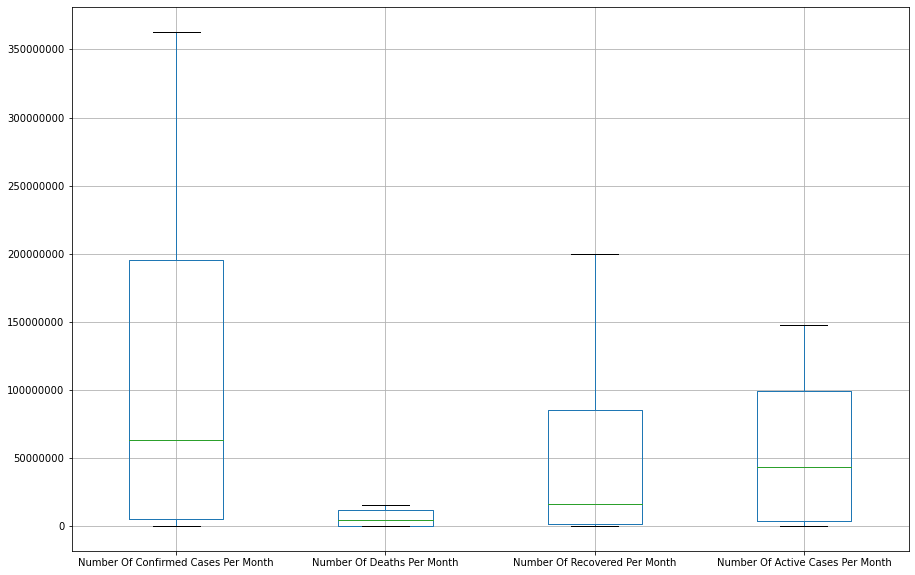

In [129]:
plt.figure(figsize=(15,10))
boxplot = Covid_19_df.boxplot(column=['Number Of Confirmed Cases Per Month', 'Number Of Deaths Per Month', 'Number Of Recovered Per Month', 'Number Of Active Cases Per Month'])
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)

Con la gráfica anterior podemos deducir que no tenemos valores atípicos y que la muestra estadística no es simétrica ya que la mediana no se encuenta en la mitad de la caja. Por otro lado, podemos evidenciar que la tasa de mortalidad en ese período (6 meses) fue relativamente baja porque la caja de rango intercuartil y los bigotes correspondientes al número de muertes por mes, no representa el 50% de los casos confirmados por Covid 19.  